In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
import pandas as pd

In [4]:
# Step 1: Load dataset
# -----------------------------
df = pd.read_csv("Uber_Customer_Support_Tickets_Prepared.csv")
print("Dataset loaded! Shape:", df.shape)
df.head()

Dataset loaded! Shape: (999, 15)


,Ticket_ID,Created_At,Channel,Response_Time_Minutes,Resolution_Time_Minutes,CSAT_Score,Issue_Type,Day,Month,Weekday,Daily_Ticket_Count,Channel_Code,Issue_Code,Resolution_Category,CSAT_Binary
0,T0001,21-02-2025,Live Agent,4,175,3,Ride Cancellation,21,2,Friday,13,1,5,Slow,0
1,T0002,15-01-2025,Live Agent,7,15,4,Lost Item,15,1,Wednesday,11,1,3,Fast,1
2,T0003,13-03-2025,Live Agent,8,162,4,Account Access,13,3,Thursday,9,1,0,Slow,1
3,T0004,02-03-2025,Live Agent,17,154,2,Lost Item,2,3,Sunday,12,1,3,Slow,0
4,T0005,21-01-2025,Chatbot,5,70,5,Lost Item,21,1,Tuesday,11,0,3,Slow,1


In [5]:
# Step 2: Create binary CSAT target
# -----------------------------
# Define High CSAT as 4 or 5, Low CSAT as 1-3
df['CSAT_High'] = (df['CSAT_Score'] >= 4).astype(int)
df['CSAT_High'].value_counts()


CSAT_High
1    639
0    360
Name: count, dtype: int64

In [6]:
# Step 3: Select features
# -----------------------------
# Include relevant features
features = ['Channel', 'Response_Time_Minutes', 'Resolution_Time_Minutes', 'Issue_Type', 'Daily_Ticket_Count']


In [7]:
# One-hot encode categorical features
X = pd.get_dummies(df[features], drop_first=True)
y = df['CSAT_High']

In [8]:
# Step 4: Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
# Step 5: Train Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
# Step 6: Evaluate model
# -----------------------------
y_pred = rf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.36      0.21      0.26        72
           1       0.64      0.79      0.71       128

    accuracy                           0.58       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.54      0.58      0.55       200

Confusion Matrix:

[[ 15  57]
 [ 27 101]]


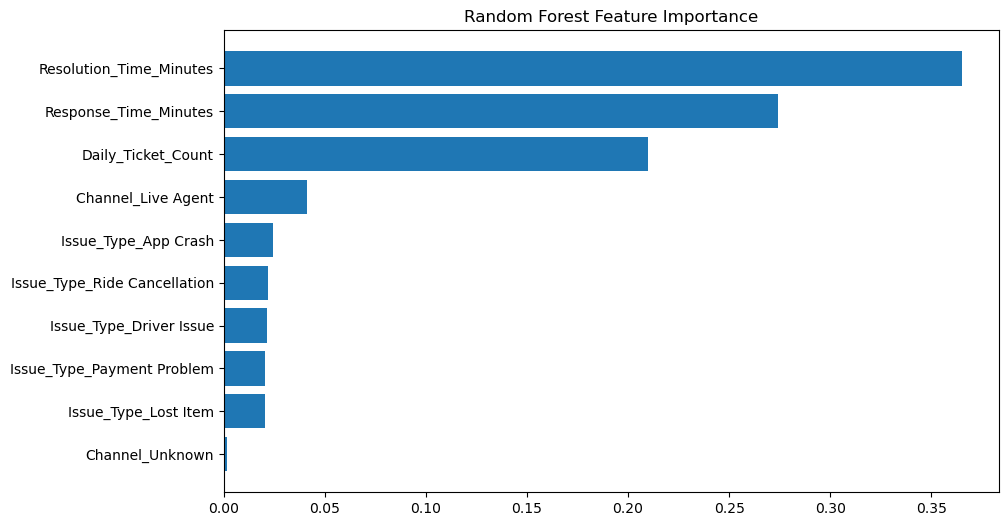

In [11]:
# Step 7 (Optional): Feature Importance
# -----------------------------
import matplotlib.pyplot as plt
import numpy as np

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_importances.index, feat_importances.values)
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.show()